In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [25]:
#load the dataset
loan_Data = pd.read_csv(r"C:\Users\25670\Desktop\project 2\loan_data.csv")

In [26]:
# Exploratory Data Analysis (EDA)
loan_Data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [28]:
loan_Data.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [29]:
# Check for missing and incorrect values
loan_Data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [30]:
loan_Data.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [31]:
# Data Preprocessing
# Transform categorical values into numerical values (discrete)
label_encoder = LabelEncoder()
loan_Data['purpose'] = label_encoder.fit_transform(loan_Data['purpose'])

In [32]:
loan_Data['purpose']

0       2
1       1
2       2
3       2
4       1
       ..
9573    0
9574    0
9575    2
9576    4
9577    2
Name: purpose, Length: 9578, dtype: int32

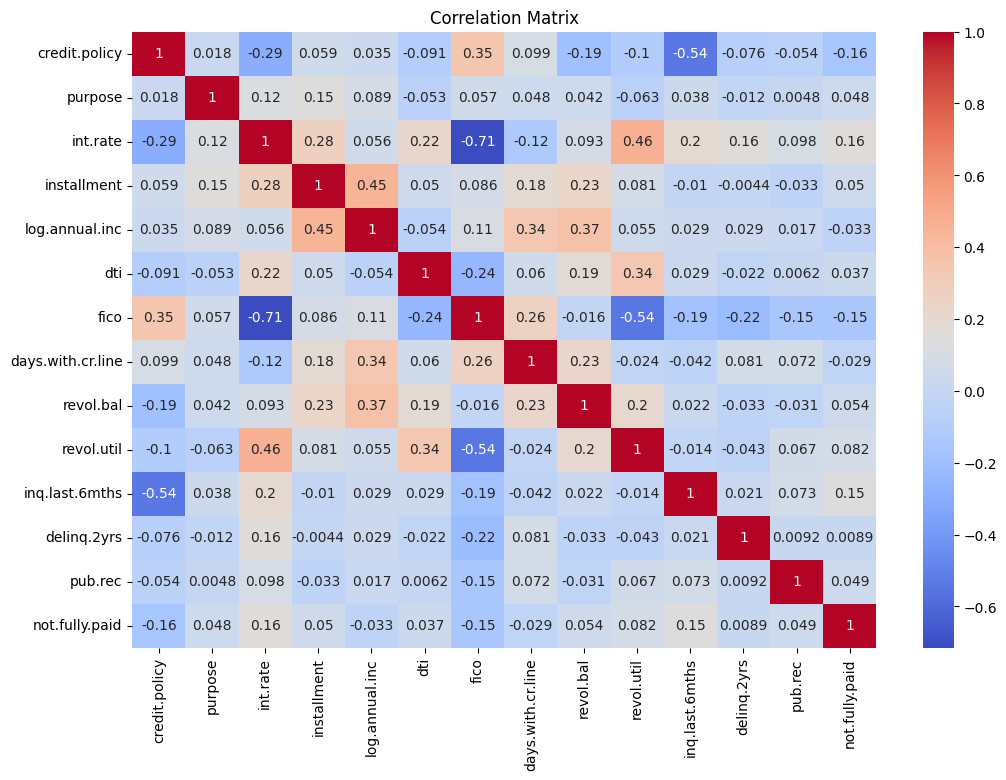

In [33]:
# Additional Feature Engineering
# Check the correlation between features
correlation_matrix = loan_Data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

according to the correlation matrix a few features possess a strong negative correlation. These features will be dropped with the following steps

In [ ]:
#Drop features with strong correlation 
#These are int.rate inq.last 6mnths, revol.bal, fico and credit policy
#fico and credit policy are important to our analysis thus the others will be removed manually to avoid coding errors

In [41]:
loan_Data = loan_Data.drop('int.rate', axis=1)

In [45]:
loan_Data  = loan_Data.drop('inq.last.6mths', axis=1)

In [46]:
loan_Data  = loan_Data.drop('revol.bal', axis=1)

In [48]:
#Modelling

In [49]:
# Split the data into features and target variable
X = loan_Data.drop('credit.policy', axis=1)
y = loan_Data['credit.policy']

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [53]:
# Modeling - Deep Learning Model using Keras with TensorFlow backend
from keras.layers import Input, Dense
input_layer = Input(shape=(784,))
model.add(Dense(64))
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [54]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')


Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7294 - loss: 0.5870 - val_accuracy: 0.8085 - val_loss: 0.4538
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8105 - loss: 0.4750 - val_accuracy: 0.8132 - val_loss: 0.4361
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8108 - loss: 0.4482 - val_accuracy: 0.8137 - val_loss: 0.4279
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8036 - loss: 0.4458 - val_accuracy: 0.8132 - val_loss: 0.4219
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8094 - loss: 0.4535 - val_accuracy: 0.8205 - val_loss: 0.4170
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8142 - loss: 0.4411 - val_accuracy: 0.8215 - val_loss: 0.4123
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8229 - loss: 0.4267 - val_accuracy: 0.8325 - val_loss: 0.4080
Epoch 8/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8285 - loss: 0.4127 - val_accuracy:

The resulting accuracy is given as 0.8423

In [56]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
print('Classification Report:')
print(classification_report(y_test, y_pred))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[  94  278]
 [  24 1520]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.25      0.38       372
           1       0.85      0.98      0.91      1544

    accuracy                           0.84      1916
   macro avg       0.82      0.62      0.65      1916
weighted avg       0.84      0.84      0.81      1916



Based on the provided classification report with an accuracy of 0.84, we can draw the following conclusions and recommendations regarding the project:

1. Precision and Recall:
   - The precision for class 0 is 0.80, indicating that when the model predicts class 0, it is correct 80% of the time. However, the recall for class 0 is only 0.25, suggesting that the model is not effectively capturing all instances of class 0. This imbalance between precision and recall for class 0 indicates that the model may be biased towards predicting class 1.
   - The precision and recall for class 1 are both high, indicating that the model performs well in predicting class 1.

2. F1-Score:
   - The F1-score for class 0 is 0.38, which is relatively low. This suggests that the model's ability to correctly identify class 0 is not optimal.
   - The F1-score for class 1 is high at 0.91, indicating that the model performs well in identifying class 1.

3. Support:
   - The support for class 1 is significantly higher than for class 0, indicating class imbalance in the dataset.

4. Accuracy:
   - The overall accuracy of the model is 0.84, which is relatively high. However, given the class imbalance and the discrepancies in precision, recall, and F1-score between the two classes, accuracy alone may not provide a complete picture of the model's performance.

Recommendations:
- Address Class Imbalance: Given the significant class imbalance, it is important to address this issue to ensure that the model is not biased towards the majority class. Techniques such as oversampling the minority class or undersampling the majority class can be considered to balance the class distribution.
- Model Evaluation: While the overall accuracy is 0.84, it is essential to evaluate the model's performance using additional metrics such as ROC curve, precision-recall curve, and confusion matrix to gain a comprehensive understanding of its strengths and weaknesses.
- Feature Importance: Analyze the importance of features in the model to identify which features are contributing the most to the predictions. This can help in understanding the factors driving the model's performance and potentially improving it.

In conclusion, while the model demonstrates a high accuracy, the class imbalance and discrepancies in precision, recall, and F1-score between the classes indicate the need for further evaluation, addressing class imbalance, and analyzing feature importance to enhance the model's performance.